<a href="https://colab.research.google.com/github/estebancardona1/Analitica/blob/main/Taller_precios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TALLER 3**

A partir del dataframe construido en la tarea del modulo pasado identificar todos los problemas que se pueden ver en los datos: datos faltantes, datos duplicados, problemas de escalado, incosistencias, datos outliers, entre otros.

In [23]:
#Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import math

In [24]:
#Lectura de datos
data = pd.read_csv("precios_pdtos_agricolas.cvs")
data

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
1,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,4.316108,-74.181073
2,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
3,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
4,Arveja verde en vaina,cúcuta,9417,0.11,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
8850,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
8851,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
8852,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
8853,Yuca*,santa marta,n.d.,n.d.,29ago2023,11.121894,-73.885279


## <font color='157699'> **Validación de duplicados** </font>

Inicialmente se revisa si se presentan **datos duplicados**, asosiados a productos de una misma ciudad y en una misma fecha, para este caso se presentan valores duplicados, pero estan asociados también a datos faltantes, por lo cual es recomendable eliminar estos datos ya que no aportan información a la temática central que es revisar los precios y la variablilidad de los mismos.


In [25]:
#Validar si hay datos duplicados
duplicados = data.duplicated(keep=False)
filas_duplicadas = data[duplicados]
print(filas_duplicadas)

data = data.drop_duplicates()


             producto   ciudad precio variabilidad      fecha   LATITUD  \
857   Chócolo mazorca  pereira   n.d.         n.d.  03ago2023  4.803663   
858   Chócolo mazorca  pereira   n.d.         n.d.  03ago2023  4.803663   
969         Zanahoria  pereira   n.d.         n.d.  03ago2023  4.803663   
970         Zanahoria  pereira   n.d.         n.d.  03ago2023  4.803663   
1263   Plátano guineo  pereira   n.d.         n.d.  03ago2023  4.803663   
1264   Plátano guineo  pereira   n.d.         n.d.  03ago2023  4.803663   
2747  Chócolo mazorca  pereira   n.d.         n.d.  10ago2023  4.803663   
2748  Chócolo mazorca  pereira   n.d.         n.d.  10ago2023  4.803663   
2859        Zanahoria  pereira   n.d.         n.d.  10ago2023  4.803663   
2860        Zanahoria  pereira   n.d.         n.d.  10ago2023  4.803663   
2901             Coco  pereira   n.d.         n.d.  10ago2023  4.803663   
2902             Coco  pereira   n.d.         n.d.  10ago2023  4.803663   
3153   Plátano guineo  pe

## <font color='157699'> **Validación de datos faltantes** </font>

Después, se revisa si se presentan **datos faltantes** en la base de datos, hay que tener presenque que algunos valores están guardados como 'n.d.' correspondientes a un `string`, y no directamente asociado a un `None `/` NaN`, por lo cual se debe hacer su respectiva corrección mediante la librería `numpy`.

In [26]:
#Reemplazar los dados 'n.d.' por NaN para ser utilizados como faltantes
data.replace('n.d.', np.nan, inplace=True)

# Muestra las variables que tienen datos faltantes
print(data.isnull().any())

print("--------------------------------------")

# Muestra la cantidad de datos faltantes
print(data.isnull().sum())

producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
LATITUD          True
LONGITUD         True
dtype: bool
--------------------------------------
producto           0
ciudad             0
precio          2173
variabilidad    2316
fecha              0
LATITUD          805
LONGITUD         805
dtype: int64


<ipython-input-26-cdc02307e190>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



De la base de datos, después de realzar las correcciones asociadas a **datos faltantes**, se identificó que las variables asociadas a **precio**, **variabilidad**, **latitud** y **longitud** cuentan con datos faltantes.
Lo que se busca entonces es identificar cuál método de imputación es el adecuado para cada dato faltante, en caso de ser la no comercialización de alguno de los productos en la ciudad, lo ideal sería eliminar la fila de información.

In [27]:
#Poner los productos iguales
data['producto'] = data['producto'].str.replace('Aguacate ', 'Aguacate')
data['producto'] = data['producto'].str.replace('Papa  criolla', 'Papa criolla')

#Eliminar filas que no contengan precio
data = data.dropna(subset=['precio'])

#Para los valores faltantes de variabilidad se reemplazan con 0
data['variabilidad'].fillna(0, inplace = True)

#Asignar latitud y longitud a las ciudades faltantes
data.loc[(data['ciudad'] == 'cúcuta') & data['LATITUD'].isna(), 'LATITUD'] = 7.8939100
data.loc[(data['ciudad'] == 'cúcuta') & data['LONGITUD'].isna(), 'LONGITUD'] = -72.5078200

data.loc[(data['ciudad'] == 'cartagena') & data['LATITUD'].isna(), 'LATITUD'] = 10.4000
data.loc[(data['ciudad'] == 'cartagena') & data['LONGITUD'].isna(), 'LONGITUD'] = -75.5000

<ipython-input-27-99824f0e8b25>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-99824f0e8b25>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-99824f0e8b25>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Se identificó una particularidad en el producto **Aguacate** el cual, en algunos casos, se mostraba como "Aguacate*" y en otros "Aguacate *", separado por un espacio, pero asociado al mismo producto, al igual que la **Papa criolla**, en algunos datos se mostraba separada por doble espaciado, por lo cual, inicialmente se realiza un **ajuste** para que ambos productos tengan el mismo nombre. Después se realiza la eliminación de filas las cuales no contienen **precio** (*Ya que se deduce que son ciudades las cuales no producen este producto o no tienen un registro diario de sus precios*), y finalmente se realiza la asignación de valores de latitud y longitud para las ciudades que lo requieran.

In [28]:
#VALIDACIÓN NUEVAMENTE DE FALTANTES

# Muestra las variables que tienen datos faltantes
print(data.isnull().any())

print("--------------------------------------")

# Muestra la cantidad de datos faltantes
print(data.isnull().sum())

producto        False
ciudad          False
precio          False
variabilidad    False
fecha           False
LATITUD         False
LONGITUD        False
dtype: bool
--------------------------------------
producto        0
ciudad          0
precio          0
variabilidad    0
fecha           0
LATITUD         0
LONGITUD        0
dtype: int64


In [29]:
#Revisar el tipo de variables
tipo = data.dtypes
print(tipo)

producto         object
ciudad           object
precio           object
variabilidad     object
fecha            object
LATITUD         float64
LONGITUD        float64
dtype: object


## <font color='157699'> **Tipo de variables** </font>
Según el tipo de variables es necesario **redefinir el tipo algunas variables**, entre ellas, el precio y la variabilidad, ya que están almacenadas como `object` y para análisis estadísticos es necesario trabajarlas como valores numéricos, en este caso, `float`.


In [30]:
#Convertir las variables necesarias
data['precio'] = data['precio'].astype(float)
data['variabilidad'] = data['variabilidad'].astype(float)

tipo_variable = data.dtypes
print(tipo_variable)

producto         object
ciudad           object
precio          float64
variabilidad    float64
fecha            object
LATITUD         float64
LONGITUD        float64
dtype: object


## <font color='157699'> **Categorización de variables** </font>
Se considera necesario crear una categorización para los precios y las ciudades, por lo que se decide definir unos **rangos para las variaciones** para revisar qué tan amplia fue su variación en el tiempo, se categorizan en baja, media y alta. Y para las ciudades se crea una **zonificación** en la cual se separan las ciudades de acuerdo a unas zonas específicas, entre ellas: Occidente, Oriente, Santanderes, Centro y Costa.

In [31]:
#Convertir el nombre de las ciudades en Mayúsculas
data['ciudad'] = data['ciudad'].str.upper()

occidente = ['ARMENIA', 'CALI', 'OCCIDENTE', 'PEREIRA', 'PASTO', 'POPAYÁN', 'MANIZALES', 'MEDELLÍN']
oriente = ['BOGOTÁ', 'NEIVA']
santanderes = ['BUCARAMANGA', 'CÚCUTA']
centro = ['IBAGUÉ', 'TUNJA']
costa = ['SANTA MARTA', 'BARRANQUILLA', 'VILLAVICENCIO', 'CARTAGENA', 'MONTERÍA', 'SINCELEJO', 'VALLEDUPAR']

# Crear una función para asignar la zona a cada ciudad
def asignar_zona(ciudad):
    if ciudad in occidente:
        return 'Occidente'
    elif ciudad in oriente:
        return 'Oriente'
    elif ciudad in santanderes:
        return 'Santanderes'
    elif ciudad in centro:
        return 'Centro'
    elif ciudad in costa:
        return 'Costa'
    else:
        return 'Otra'

# Aplicar la función a la columna 'ciudad' y crear una nueva columna 'zona'
data['zona'] = data['ciudad'].apply(asignar_zona)

# Definir los límites de los intervalos y nombres de categorías
valores = [-math.inf, 0.25, 0.75, math.inf]
categorias = ['Baja', 'Media', 'Alta']

# Calcular el valor absoluto de la columna 'variabilidad'
data['variabilidad_abs'] = data['variabilidad'].abs()

# Aplicar la clasificación a la columna 'variabilidad_abs'
data['variacion'] = pd.cut(data['variabilidad_abs'], bins=valores, labels=categorias)

## <font color='157699'> **Outliers** </font>

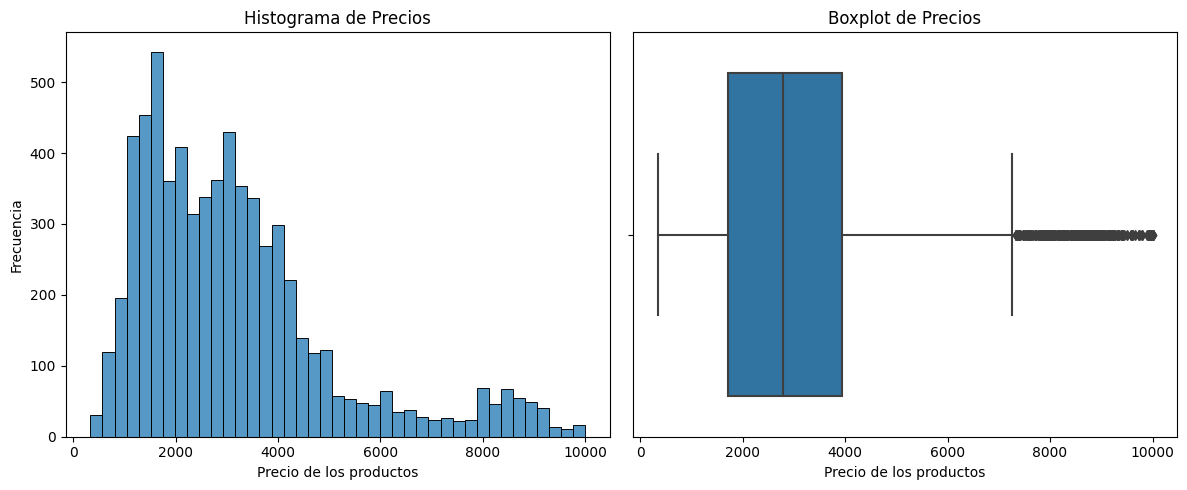

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico: Histograma
sns.histplot(data, x='precio', ax=axes[0])
axes[0].set_xlabel('Precio de los productos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Precios')

# Segundo gráfico: Boxplot
sns.boxplot(data, x='precio', ax=axes[1])
axes[1].set_xlabel('Precio de los productos')
axes[1].set_title('Boxplot de Precios')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Es necesario para la identificación de datos atipicos u outliers hacer un **filtro por producto** ya que que al tener una base de datos completa con varios productos hace que el precio presente mayor disperción y **no sería lo adecuado.**
Después de realizar el filtro por algunos productos, **no se identifica alguna variacion significativa** por lo que se decide **conservar la base de datos completa**, lo cual tiene sentido ya que es únicamente la variación en un mes del año.

## <font color='157699'> **Análisis gráfico** </font>

Se plantean algunas preguntas que se pueden resolver mediante un anáisis gráfico, entre ellas las siguientes:

**1. ¿Cúal es el comportamiento de los precios de los productos en alguna ciudad en específico (en este caso Medellín)?**

In [32]:
# Filtra los datos solo para Medellín
ciudades = data['ciudad'].unique()

ciudad = input("Ingrese una ciudad (Recuerde poner tíldes de ser necesario): ")
ciudad = ciudad.upper()

while not ciudad in ciudades:
    print("La ciudad no está en la base de datos, intente nuevamente")
    ciudad = input("Ingrese una ciudad (Recuerde poner tíldes de ser necesario): ")
    ciudad = ciudad.upper()

ciudad_seleccionada = data[data['ciudad'] == ciudad]

fig = px.line(ciudad_seleccionada, x='fecha', y='precio', color='producto', title='Línea de Tiempo de Precios de Productos en Medellín')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(title='Fecha')
fig.update_yaxes(title='Precio')
fig.show()

Ingrese una ciudad (Recuerde poner tíldes de ser necesario): Medellín


En la línea del tiempo de los precios, se observa entonces todos los productos y su variación en el mes de agosto, mediante un gráfico interactivo, el cuál permite seleccionar cada producto por separado y ver su comportamiento en el mes, esto permite identificar tendencias las cuales pueden ser consecuencias de acontecimientos que surgieron en la ciudad seleccionada en alguna temporada.

**2. ¿Cuál es el precio promedio de un producto en específico para el mes de agosto?**

In [33]:
# Variable para guardar el producto seleccionado
productos_unicos = data['producto'].unique()

# Crear un widget de lista desplegable para seleccionar el producto
producto_dropdown = widgets.Dropdown(
    options=productos_unicos,
    description='Producto:',
    disabled=False
)
producto_seleccionado = None  # Inicialmente, la variable es None

# Conectar la variable con el evento de cambio en la lista desplegable
def actualizar_producto_seleccionado(change):
    global producto_seleccionado
    producto_seleccionado = change.new

producto_dropdown.observe(actualizar_producto_seleccionado, names='value')

# Mostrar la lista desplegable de los productos
display(producto_dropdown)


Dropdown(description='Producto:', options=('Arveja verde en vaina', 'Cebolla cabezona blanca', 'Cebolla junca'…

In [34]:
df_producto = data[data['producto'] == producto_seleccionado]

# Calcula el precio promedio por ciudad
promedio_ciudad = df_producto.groupby('ciudad')['precio'].mean().reset_index()

# Ordena el DataFrame por precio promedio ascendente (ciudad más barata primero)
promedio_ciudad = promedio_ciudad.sort_values(by='precio', ascending=True)


# Crea un gráfico de barras
fig = px.bar(promedio_ciudad, x='ciudad', y='precio',
             title=f'Precios Promedio de "{producto_seleccionado}" por Ciudad')
fig.update_xaxes(title='Ciudad')
fig.update_yaxes(title='Precio Promedio')
fig.show()


El gráfico anterior, muestra el comportamiento del precio de un producto en específico en cada una de las ciudades, esto puede ser importante para un comprador externo que quiera comprar el producto y revisar en qué ciudad puede ser más barato, también, para compradores cercanos a alguna de las ciudades que no están en la base de datos, identificar cuál centro de abastos es más conveniente para comprar el producto.

**3. ¿Cómo varía el precio promedio de un producto seleccionado en las zonas o ciudades cercanas?**

In [35]:
# Filtra los datos para el producto seleccionado
df_producto2 = data[data['producto'] == producto_seleccionado]

# Calcula el precio promedio, latitud y longitud por ciudad
promedio_ciudad = df_producto2.groupby('ciudad').agg({
    'precio': 'mean',
    'LATITUD': 'first',
    'LONGITUD': 'first'
}).reset_index()

# Crea un mapa de calor
fig = px.scatter_geo(promedio_ciudad, lat='LATITUD', lon='LONGITUD', color='precio',
                     hover_name='ciudad', projection='natural earth',
                     title=f'Mapa de Calor del Precio Promedio de "{producto_seleccionado}" por Ciudad')

fig.update_traces(marker=dict(size=7))

# Muestra el mapa interactivo
fig.show()


Consecuente con el gráfico de precios promedio por ciudad se plantea un mapa de calor, utilizando la latitud y longitud para el producto seleccionado, con el fin de identificar qué tan cercano se encuentran los centros de abastos y cómo es su precio promedio, ésto puede ser una alternativa o una oportunidad de negociación entre centros de abastos cercanos o para escoger un proveedor para este producto. Entrarían entonces nuevas variables que pueden ser asociadas a tiempos de entrega y costos de transporte.

**4. ¿Cómo se distribuye el precio de cada uno de los productos?**

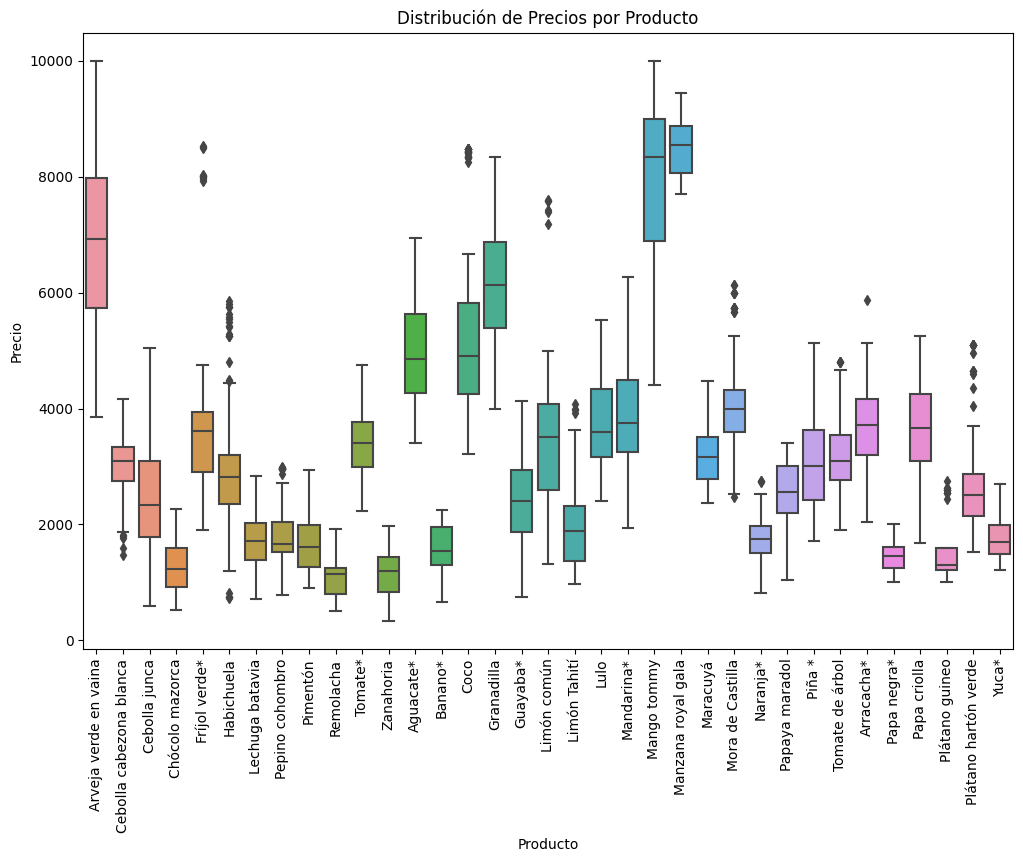

In [36]:
# Crear un boxplot para cada producto en una sola figura
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico según tus preferencias

# Agrupa los datos por 'producto' y crea un boxplot para cada grupo
ax = sns.boxplot(x='producto', y='precio', data=data)
ax.set_xlabel('Producto')
ax.set_ylabel('Precio')
ax.set_title('Distribución de Precios por Producto')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.show()


Para cada uno de los productos es pertinente revisar cómo es la variación en sus precios en todas la ciudades con el fin de identificar datos atípicos, sin embargo estos datos pueden estar asociados a ciertas ciudades en las que en casos extremos tuvieron que aumentar o disminuir el precio de sus productos.

**5. ¿Cómo es el precio promedio de los productos en las distintas zonas asignadas?**

In [37]:
# Calcula el precio promedio por producto y zona
promedio_zona = data.groupby(['producto', 'zona'])['precio'].mean().reset_index()

# Crea el gráfico de barras
fig = px.bar(promedio_zona, x='producto', y='precio', color='zona',
             labels={'producto': 'Producto', 'precio': 'Precio Promedio'},
             title='Precio Promedio de Productos por Zona')

# Mostrar el gráfico
fig.show()

En este gráfico se pueden apreciar las variaciones que tiene el precio de los distintos productos en las zonas asignadas: Centro, Costa, Occidente, Oriente y Santanderes, con esta información se podrían identificar zonas potencias de algunos productos y la explicación del porqué son más altas o bajas las variaciones en estas zonas.

## <font color='157699'> **Conclusiones** </font>

*   Fue necesario eliminar filas duplicadas que además contaban con valores faltantes, en las demás ciudades que se presentaban datos faltantes asociados al precio, se consideró la eliminación de los mismos ya que la principal variable de la base de datos es el precio de cada producto.
* Se realizaron correcciones en el nombramiento de productos, puntualmente el aguacate y la papa criolla.
* Se asignaron valores de latitud y longitud a las ciudades que no contaban con estos valores.
* Se hicieron correcciones en los tipos de variables asociados a precio y variabilidad para ser nombrados como decimales.
* Se crearon categorías asociadas a las ciudades y variabilidades, para la primera una zonificación entre Occidente, Oriente, Centro, Costa y Santanderes, y para la segunda, variación baja, media y alta.
* No se consideraron correcciones de normalización ni outliers ya que si se desea analizar el comportamiento de los precios es necesario contar con la totalidad de datos e identificar cuáles factores hacen que los precios presenten variabilidades amplias en los precios.
* Se plantean preguntas y gráficos que ayudan a visualizar el comportamiento de los precios y productos en diferentes zonas, ciudades del país con el fin de identificar comportamientos que sirvan para realizar análisis más exactos y detallados.
